# Assignment 4: EDA and Bootstrapping

## Objective

Statistics play a vital role in data science for (at least) two reasons. First, it can be used to gain a deep understanding of data. This process is known as **Exploratory Data Analysis (EDA)**. Second, it can be used to infer the relationship between a sample and the population. This process is known as **inference**. In this assignment, you will learn about EDA and statistical inference through the analysis of a very interesting dataset - [property tax report data](http://data.vancouver.ca/datacatalogue/propertyTax.htm). Specifically, you will learn the followings:

1. Be able to perform EDA on a single column (i.e., univariate analysis) 
2. Be able to perform EDA on multiple columns (i.e., multivariate analysis)
3. Be able to extract insights from visualizations
4. Be able to ask critical questions about data
5. Be able to estimate a population parameter based on a sample
6. Be able to use the bootstrap to quantify the uncertainty of an estimated value

In this assignment, you can use [pandas](https://pandas.pydata.org/) or PySpark to manipulate data, and use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots. 

## Part 1. EDA

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze the Vancouver's housing price. You first download a dataset from [property_tax_report_2018.zip](property_tax_report_2018.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2018.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). But this is not enough. You still know little about the data. That's why you need to do EDA in order to get a better and deeper understanding of the data.

We first load the data as a DataFrame. To make this analysis more interesting, I added two new columns to the data: `CURRENT_PRICE` represents the property price in 2018; `PREVIOUS_PRICE` represents the property price in 2017. 

In [3]:
import pandas as pd

df = pd.read_csv("property_tax_report_2018.csv")

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

Now let's start the EDA process. 

**Hint.** For some of the following questions, I provided an example plot (see [link](http://htmlpreview.github.io/?https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A4/A4-plots.html)). But note that you do not have to use the same plot design. In fact, I didn't do a good job to follow the *Principles of Visualization Design* presented in Lecture 3.  You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [4]:
# --- Write your code below ---
df.head(5)

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3,834000,710000.0
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13,1042000,932000.0
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12,780000,689000.0
3,029-918-731,STRATA,6.401940e+11,64019406,IC-3,Light Industrial,40,26,EPS2425,200A,...,170000,2018,168000.0,170000.0,NaN,NaN,NaN,13,397000,338000.0
4,017-393-400,STRATA,6.011150e+11,60111496,CD-1 (233),Comprehensive Development,7,NaN,LMS75,185,...,380000,2018,531000.0,385000.0,1991.0,1991.0,NaN,27,1181000,916000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.

In [5]:
# --- Write your code below ---
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000,2.053460e+05,2.030420e+05
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159,2.263062e+06,2.082860e+06
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394,1.258726e+07,1.131819e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,1.000000e+00
25%,2.107920e+11,2.107919e+07,948.000000,4.680000e+05,9.530000e+04,2018.0,3.840000e+05,9.470000e+04,1965.000000,1975.000000,NaN,9.000000,6.530000e+05,5.670000e+05
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000,1.278000e+06,1.201000e+06
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000,1.984000e+06,1.937000e+06
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000,3.516727e+09,3.319471e+09


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [6]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
df_uni = df['YEAR_BUILT']

def perc_missing(df):
    is_null_count = df.isnull().sum()
    total_count = df.count()
    
    print("is_null count:\t", is_null_count)
    print("total count:\t", total_count)
    
    null_perc = 100 * (is_null_count / total_count)
    
    print("null perc:\t", null_perc)
    return null_perc

perc_missing(df_uni)

is_null count:	 10447
total count:	 194899
null perc:	 5.36021221248


5.3602122124792846

Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1900 to 2018)?" Please plot a line chart to answer the question.

In [8]:
# --- Write your code below ---
from pylab import rcParams

%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
rcParams['figure.figsize'] = (8,6)
sns.set(rc={'figure.figsize':(16,8)})
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [9]:
rows_in_range = ((df['YEAR_BUILT'] >= 1990) & (df['YEAR_BUILT'] <= 2018))
df_q4 = df[rows_in_range]['YEAR_BUILT']
df_q4

0         2003.0
4         1991.0
5         2011.0
19        2007.0
21        2007.0
23        1993.0
24        2008.0
25        1993.0
26        2006.0
33        2007.0
37        1992.0
40        2008.0
42        2005.0
45        1992.0
51        1990.0
53        1996.0
60        1992.0
61        2009.0
67        1995.0
68        1999.0
77        1996.0
86        1992.0
89        1996.0
108       1991.0
110       2001.0
116       1991.0
118       1991.0
120       1999.0
123       1996.0
125       1994.0
           ...  
205252    2014.0
205254    1993.0
205255    2006.0
205259    2011.0
205261    2006.0
205262    2007.0
205264    2007.0
205267    1994.0
205270    2003.0
205271    2010.0
205273    2011.0
205274    1990.0
205275    1995.0
205276    2012.0
205277    2004.0
205280    1995.0
205284    1997.0
205285    2004.0
205296    2009.0
205298    1994.0
205307    2009.0
205313    2005.0
205314    2006.0
205318    2009.0
205322    2010.0
205329    2007.0
205332    2009.0
205340    2009

In [10]:
from collections import Counter
value_counts = Counter(df_q4.values)
value_counts

Counter({1990.0: 3477,
         1991.0: 2784,
         1992.0: 3041,
         1993.0: 4315,
         1994.0: 6302,
         1995.0: 5665,
         1996.0: 4112,
         1997.0: 4795,
         1998.0: 4794,
         1999.0: 4877,
         2000.0: 4053,
         2001.0: 1533,
         2002.0: 3727,
         2003.0: 3368,
         2004.0: 3867,
         2005.0: 5027,
         2006.0: 4401,
         2007.0: 4089,
         2008.0: 4457,
         2009.0: 5002,
         2010.0: 2708,
         2011.0: 3469,
         2012.0: 3415,
         2013.0: 3875,
         2014.0: 3237,
         2015.0: 18})

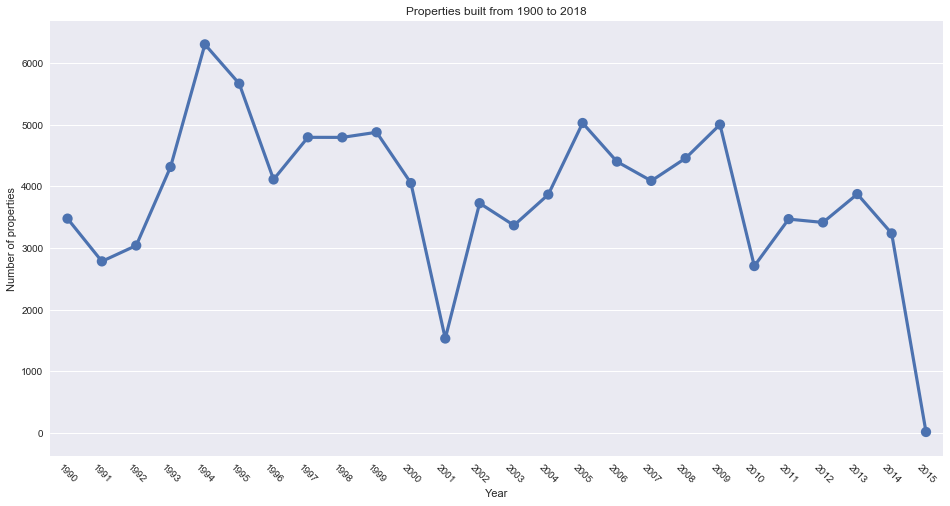

In [100]:
x_vals = []
y_vals = []

for x,y in sorted(value_counts.items()):
    x_vals.append(int(x))
    y_vals.append(y)
    
df_main = pd.DataFrame()

df_main['year'] = x_vals
df_main['prop_count'] = y_vals

barchart = sns.pointplot(x='year', y='prop_count', data=df_main)
plt.xticks(rotation=-45)
barchart.set_title('Properties built from 1900 to 2018')
barchart.set_ylabel('Number of properties')
barchart.set_xlabel('Year')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>. For each finding, please write <font color="red">no more than 2 sentences</font>.

**Findings**
1. Vancouver had the maximum number of properties in the year 1994, that too being more than 6000 properties.
2. The lowest number of properties that Vancouver had was in the year 2001, that tooo somewhere about 1500 properties. Having close to no properties is quite unusual for 2015 which can be attributed to stop of data collection for some reason.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2018, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

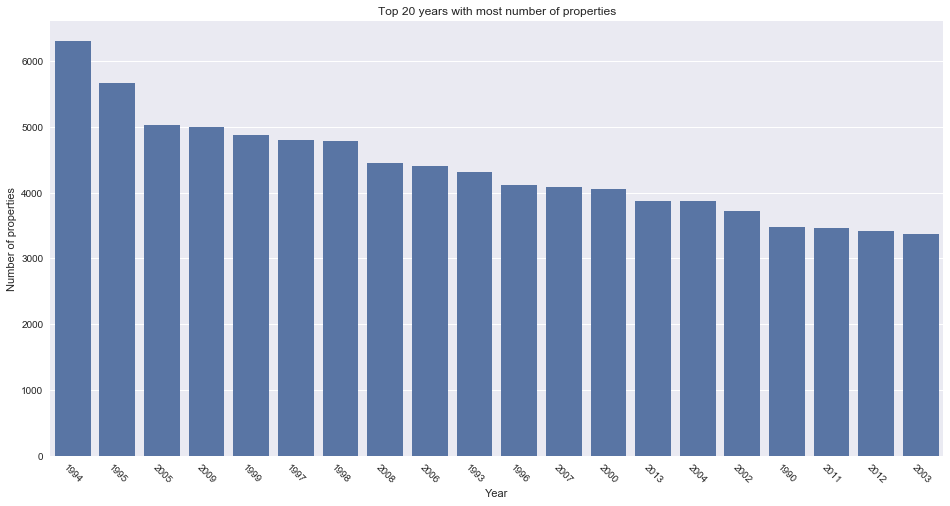

In [103]:
# --- Write your code below ---

top_20_years = df_main.sort_values(by='prop_count', ascending=False)
top_20_years = top_20_years.head(20)


barchart = sns.barplot(x='year', y='prop_count', data=top_20_years, color="b", order=top_20_years['year'])
plt.xticks(rotation=-45)

barchart.set_title('Top 20 years with most number of properties')
barchart.set_ylabel('Number of properties')
barchart.set_xlabel('Year')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Vancouver had roughly the same number of properties in the year 1997 and 1998.
2. There wasn't a gargantuan change in the number of properties between 1998 and 1999.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2018? Please plot a histogram to answer this question.

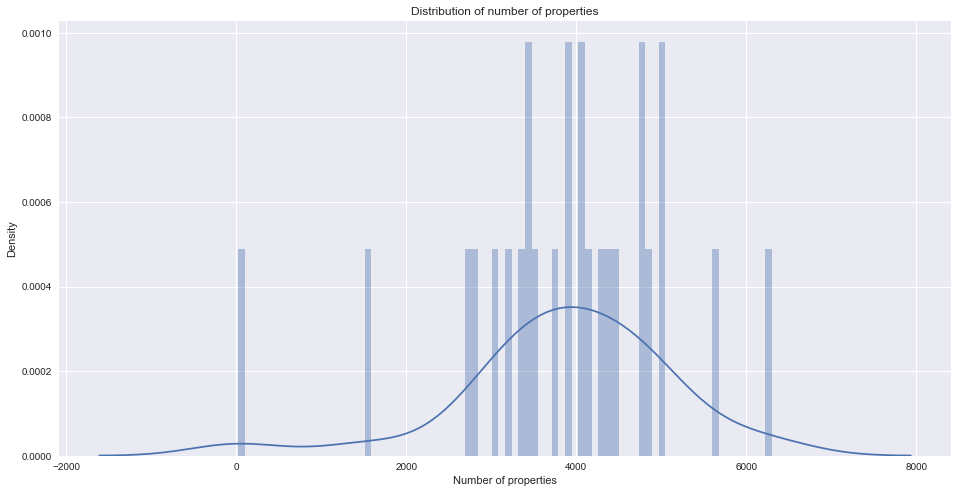

In [101]:
# --- Write your code below ---
hist = sns.distplot(df_main['prop_count'], bins=80)

hist.set_title('Distribution of number of properties')
hist.set_ylabel('Density')
hist.set_xlabel('Number of properties')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The mean of the number of properties ever existing in Vancouver between 1990 and 2018 is around 4000 properties.
2. Usually, the number of properties in Vancouver were around 3700 to 5000 properties.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

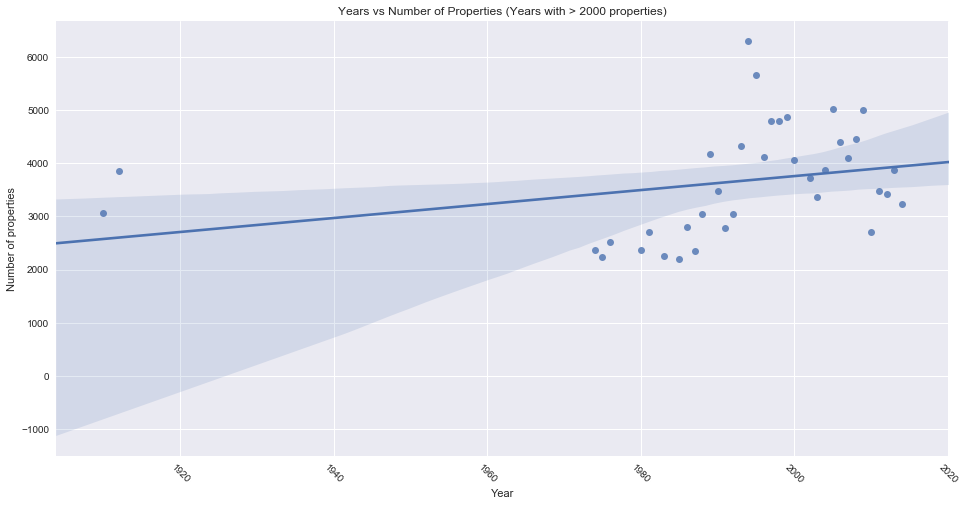

In [119]:
# --- Write your code below ---
value_counts = Counter(df[df['YEAR_BUILT'].notnull()]['YEAR_BUILT'].values)
x_vals = []
y_vals = []

for x,y in sorted(value_counts.items()):
    x_vals.append(int(x))
    y_vals.append(y)
    
df_scatter = pd.DataFrame()

df_scatter['year'] = x_vals
df_scatter['prop_count'] = y_vals

prop_count_more = df_scatter['prop_count'] > 2000

df_scatter = df_scatter[prop_count_more]

scatterplot = sns.regplot(x='year', y='prop_count', data=df_scatter)
plt.xticks(rotation=-45)

scatterplot.set_title('Years vs Number of Properties (Years with > 2000 properties)')
scatterplot.set_ylabel('Number of properties')
scatterplot.set_xlabel('Year')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. There is absolutely no correlation between the number of properties built and the year.
2. No more than 2000 properties were built in the year 2001.

### Question 8. PDF and CDF

Can you believe that you have already drawn 8 interesting findings by exploring a single column! This is the power of EDA combined with critical thinking. Now we are moving to multivariate analysis.

Suppose you want to compare the housing price between this year and last year, i.e., CURRENT_PRICE vs. PREVIOUS_PRICE. 
You can plot their distributions, and make the comparison. There are two ways to define a distribution: [Probabilistic Distribution Function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) and [Cumulative Distribution Function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF). 

In the following, please make two plots and put them side-by-side.  
* In the first plot, use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE.
* In the second plot, use histograms to plot the cumulative distributions of CURRENT_PRICE and PREVIOUS_PRICE.

There are a few properties which are way more expensive than the others. For both plots, please exclude those properties by setting `xlim` = (0, 5Million).

/Users/mvachher/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


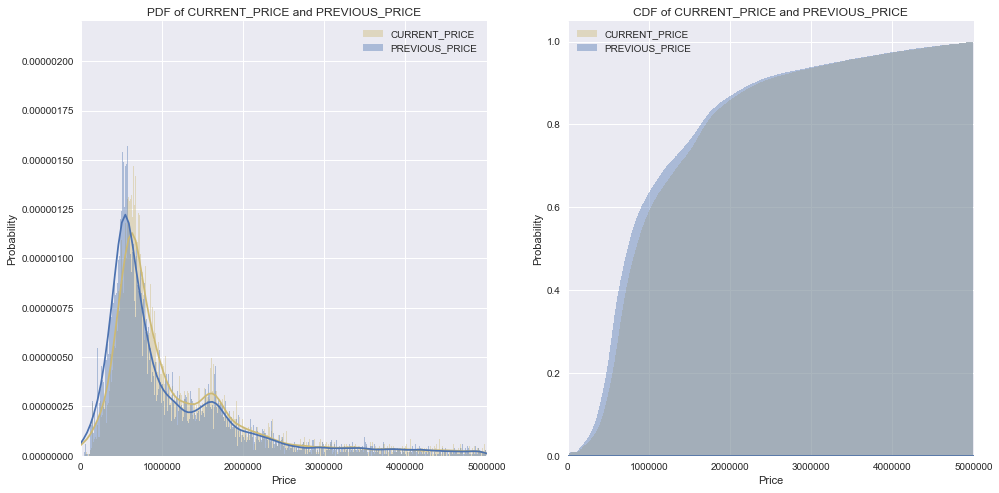

In [116]:
# --- Write your code below ---
fig, ax =plt.subplots(1,2)

five_mil = 5e+06

curr_notNA = df['CURRENT_PRICE'].notnull() & (df['CURRENT_PRICE'] < five_mil)
df_curr = df[curr_notNA]['CURRENT_PRICE']

prev_notNA = df['PREVIOUS_PRICE'].notnull() & (df['PREVIOUS_PRICE'] < five_mil)
df_prev = df[prev_notNA]['PREVIOUS_PRICE']

pdf_curr = sns.distplot(df_curr, ax=ax[0], bins=5000, color="y", label="CURRENT_PRICE")
pdf_prev = sns.distplot(df_prev, ax=ax[0], bins=5000, color="b", label="PREVIOUS_PRICE")
cdf_curr = sns.distplot(df_curr, ax=ax[1], bins=5000, hist_kws=dict(cumulative=True), color="y", label="CURRENT_PRICE")
cdf_prev = sns.distplot(df_prev, ax=ax[1], bins=5000, hist_kws=dict(cumulative=True), color="b", label="PREVIOUS_PRICE")

pdf_prev.set_title('PDF of CURRENT_PRICE and PREVIOUS_PRICE')
pdf_prev.set_ylabel('Probability')
pdf_prev.set_xlabel('Price')

cdf_prev.set_title('CDF of CURRENT_PRICE and PREVIOUS_PRICE')
cdf_prev.set_ylabel('Probability')
cdf_prev.set_xlabel('Price')

pdf_prev.legend()
cdf_prev.legend()

ax[0].set_xlim([0, five_mil])
ax[1].set_xlim([0, five_mil])
fig.show()

Please write down the **two** most interesting findings that you draw from the plots. 

**Findings**
1. Previous Price and Current Price PDFs are trimodal distributions indicating that there exist 3 price ranges around which people heavily buy houses. 
2. There has been an increase in the overall housing price, as visible through both the CDF and PDF plots.

### Question 9. Use EDA to answer an interesting question (1)

In the above plots, we found that the overall housing price has increased, but we do not which type of property has increased more. 

Now we add another variable `LEGAL_TYPE` (e.g., STRATA, LAND) to the analysis, and consider three variables (`LEGAL_TYPE`, `CURRENT_PRICE`, `PREVIOUS_PRICE`) in total. 

In the following, please make two plots and put them side-by-side.
* In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE for `LEGAL_TYPE` = "STRATA".
* In the first plot, please use histograms to plot the probabilistic distributions of CURRENT_PRICE and PREVIOUS_PRICE for `LEGAL_TYPE` = "LAND".

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/Users/mvachher/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


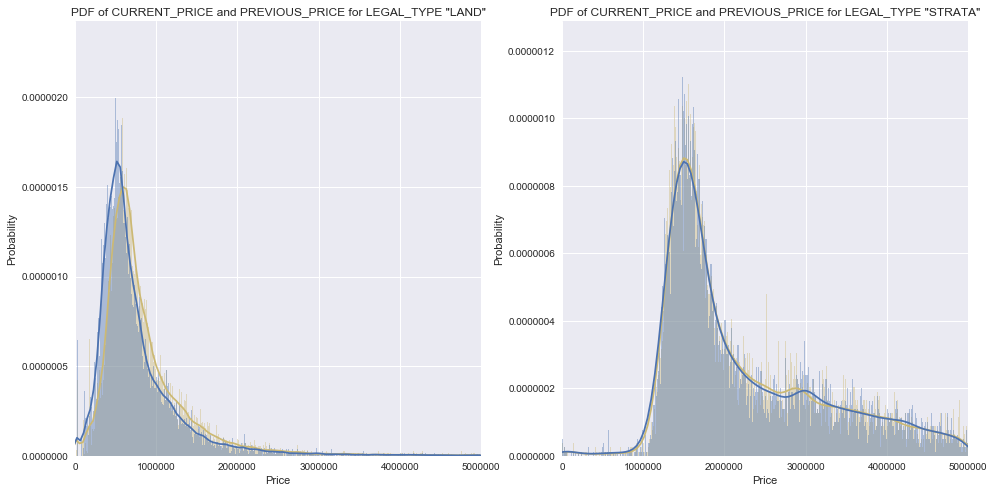

In [107]:
# --- Write your code below ---
fig, ax =plt.subplots(1,2)

five_mil = 5e+06

curr_notNA = df['CURRENT_PRICE'].notnull() & (df['LEGAL_TYPE'] == "STRATA") & (df['CURRENT_PRICE'] < five_mil)
df_curr_strata = df[curr_notNA]['CURRENT_PRICE']

prev_notNA = df['PREVIOUS_PRICE'].notnull() & (df['LEGAL_TYPE'] == "STRATA") & (df['PREVIOUS_PRICE'] < five_mil)
df_prev_strata = df[prev_notNA]['PREVIOUS_PRICE']

curr_notNA = df['CURRENT_PRICE'].notnull() & (df['LEGAL_TYPE'] == "LAND") & (df['CURRENT_PRICE'] < five_mil)
df_curr_land = df[curr_notNA]['CURRENT_PRICE']

prev_notNA = df['PREVIOUS_PRICE'].notnull() & (df['LEGAL_TYPE'] == "LAND") & (df['PREVIOUS_PRICE'] < five_mil)
df_prev_land = df[prev_notNA]['PREVIOUS_PRICE']

pdf_strata = sns.distplot(df_curr_strata, ax=ax[0], bins=5000, color="y")
pdf_strata = sns.distplot(df_prev_strata, ax=ax[0], bins=5000, color="b")
pdf_land = sns.distplot(df_curr_land, ax=ax[1], bins=5000, color="y")
pdf_land = sns.distplot(df_prev_land, ax=ax[1], bins=5000, color="b")

pdf_strata.set_title('PDF of CURRENT_PRICE and PREVIOUS_PRICE for LEGAL_TYPE "LAND"')
pdf_strata.set_ylabel('Probability')
pdf_strata.set_xlabel('Price')

pdf_land.set_title('PDF of CURRENT_PRICE and PREVIOUS_PRICE for LEGAL_TYPE "STRATA"')
pdf_land.set_ylabel('Probability')
pdf_land.set_xlabel('Price')

pdf_strata.legend()
pdf_land.legend()

ax[0].set_xlim([0, five_mil])
ax[1].set_xlim([0, five_mil])
fig.show()

Please write down the **two** most interesting findings that you draw from the plots. 

**Findings**
1. Type of property 'LAND' has almost the same price as before.
2. Type of property 'STRATA' has an increased housing price than before.

### Question 10. Use EDA to answer interesting questions (2)

Although the housing price of the entire Vancouver area is increasing, there might be some areas whose housing price is decreasing. To answer this question, we need to consider another column -- `PROPERTY_POSTAL_CODE`.

`PROPERTY_POSTAL_CODE` (e.g., "V5A 1S6") is a six-character string with a space separating the third and fourth characters. We use the first three characters to represent an *area*. 

We first filter out the areas which have less than 10 properties. For each of the remaining areas, we calculate the percentage of the properties whose price has decreased compared to the last year. For example, if an area "V5A" has 50 properties, and 30 of them have decreased, then the percentage is 60%.

Please write code to find the top-10 areas with the highest percentages. Create a bar chart to visualize them. 

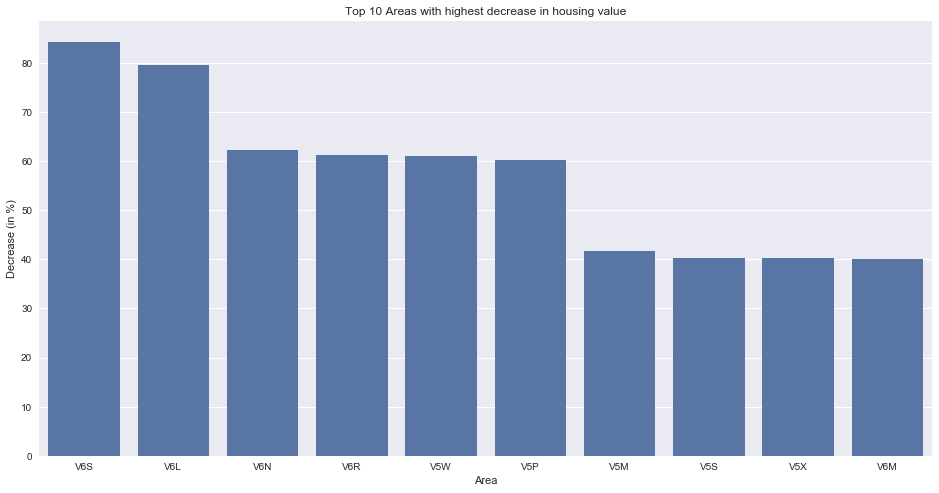

In [108]:
# --- Write your code below ---
pd.options.mode.chained_assignment = None  # default='warn'
def get_area(x):
    return x.split()[0]

prop_notNA = df['PROPERTY_POSTAL_CODE'].notnull()

df_postal = df[prop_notNA]

df_postal['area_code'] = df_postal['PROPERTY_POSTAL_CODE'].apply(get_area)
# df_postal['area_code_len'] = df_postal['area_code'].apply(lambda x: len(x))
# proper_area_code = df_postal['area_code_len'].str.len() == 3

proper_area_code = df_postal['area_code'].str.len() == 3
count_series = df_postal[proper_area_code]['area_code'].value_counts()

props_10 = count_series >= 10

count_series = count_series[props_10]

df_props_10 = pd.DataFrame({'area_code': count_series.index, 'num_props': count_series.values})

def check_price_increase(df_post):
    if df_post['CURRENT_PRICE'] >= df_post['PREVIOUS_PRICE']:
        return True
    return False

df_postal['price_dec_bool'] = df_postal['CURRENT_PRICE'] < df_postal["PREVIOUS_PRICE"]

df_reduced_postal = df_postal.merge(df_props_10, on='area_code')

perc_reduced = df_reduced_postal.groupby('area_code')['price_dec_bool'].mean()

final_result = pd.DataFrame({'area_code': perc_reduced.index, 'perc_val': perc_reduced.values})

final_result['perc_val'] = final_result['perc_val'] * 100

top_10_areas = final_result.sort_values(by='perc_val', ascending=False)
top_10_areas = top_10_areas.head(10)


barchart = sns.barplot(x='area_code', y='perc_val', data=top_10_areas, color="b", order=top_10_areas['area_code'])

barchart.set_title('Top 10 Areas with highest decrease in housing value')
barchart.set_ylabel('Decrease (in %)')
barchart.set_xlabel('Area')

plt.show()

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Area V6S had the highest percentage (~84%) of properties with decreased housing price.
2. Area V5S, V5X and V6M have the same percentage (~40%) of properties with decreased housing price.

### Question 11. Come up with your own question.

*You need to complete the following three tasks.*

Firstly, please come up with an interesting question on your own (like Q9 and Q10). 

**A short description of the question: Which years had the most number of houses having the highest rise in average improvement value **

Secondly, please write code so that the output of your code can answer the question.

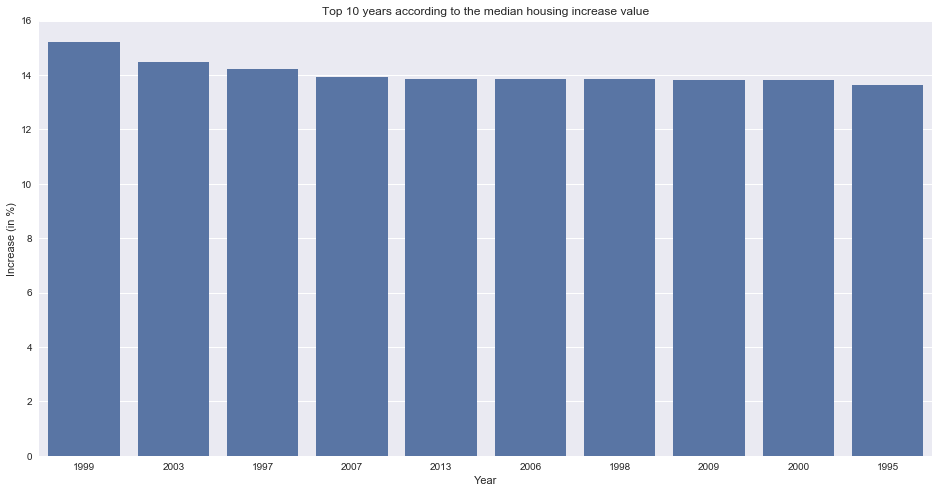

In [136]:
# --- Write your code below ---

df_prop_imprv = df[rows_in_range]

df_prop_imprv['imprv_val'] = (df['CURRENT_PRICE'] - df['PREVIOUS_PRICE']) / df['PREVIOUS_PRICE']
df_prop_imprv['imprv_val'] = df_prop_imprv['imprv_val'] * 100

df_prop_imprv = df_prop_imprv.groupby('YEAR_BUILT')['imprv_val'].median()

final_result = pd.DataFrame({'year': list(map(int, df_prop_imprv.index)), 'imprv_val': df_prop_imprv.values})

top_years = final_result.sort_values(by='imprv_val', ascending=False)
top_years = top_years.head(10)

barchart = sns.barplot(x='year', y='imprv_val', data=top_years, color="b", order=top_years['year'])

barchart.set_title('Top 10 years according to the median housing increase value')
barchart.set_ylabel('Increase (in %)')
barchart.set_xlabel('Year')

plt.show()

Thirdly, please write the two most important findings.

**Findings**
1. Most of the later half of the 1990s had a significant number of houses with high increase values.
2. 1999's central tendency measure had the highest increase percentage (~15%).

## Part 2. Bootstrapping

In Part 1, we run our analysis over the full dataset. In reality, however, you may not be that lucky. It is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., The Vancouver's housing price has increased by 10\% since last year), you should ALWAYS ask yourself: <font color="blue">"CAN I TRUST IT?"</font>. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question. 

Please download the sample dataset [property_tax_report_2018_sample.zip](property_tax_report_2018_sample.zip), and load it as a DataFrame. 

In [76]:
df_sample = pd.read_csv("property_tax_report_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

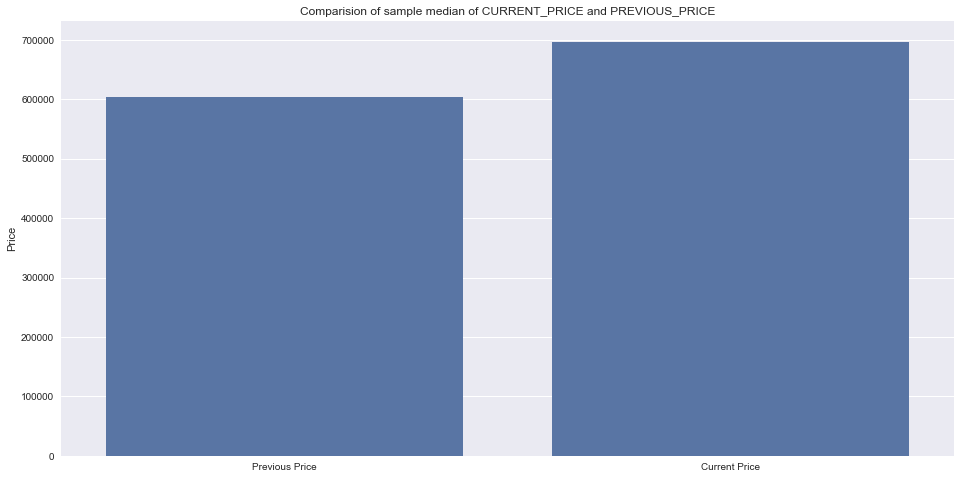

In [109]:
# --- Write your code below ---

prev_median = df_sample['PREVIOUS_PRICE'].median()
curr_median = df_sample['CURRENT_PRICE'].median()

x = ['Previous Price', 'Current Price']
y = [prev_median, curr_median]

barchart = sns.barplot(x=x, y=y, color ="b")
barchart.set_title('Comparision of sample median of CURRENT_PRICE and PREVIOUS_PRICE')
barchart.set_ylabel('Price')

pdf_prev.legend()
cdf_prev.legend()

plt.show()

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.6 M, and the median of CURRENT_PRICE is about 0.7 M. Since the numbers were obtained from the sample, <font color="blue">"CAN WE TRUST THESE NUMBERS?"</font> 

In the following, please implement the bootstrap by yourself, and compute a 95%-confidence interval for each number. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

In [87]:
# --- Write your code below ---

boot_vals = {'prev': [], 'curr': []}

for i in range(1000):
    df_bootstrap = df_sample.sample(frac=1, replace=True)
    prev_median_boot = df_bootstrap['PREVIOUS_PRICE'].median()
    curr_median_boot = df_bootstrap['CURRENT_PRICE'].median()
    
    boot_vals['prev'].append(prev_median_boot - prev_median)
    boot_vals['curr'].append(curr_median_boot - curr_median)

left_half = int(.25 * 1000) - 1
right_half = int(.975 * 1000) - 1

def compute_interval(data, left_half, right_half):
    best_choices = sorted(data)
    
    return (best_choices[left_half], best_choices[right_half])

In [110]:
med_prev_l, med_prev_r = compute_interval(boot_vals['prev'], left_half, right_half)

print("Range:", med_prev_l, "to", med_prev_r)
print("Value:", prev_median)

if prev_median >= med_prev_l and prev_median <= med_prev_r:
    print("PREVIOUS_PRICE median can be trusted.")
else:
    print("PREVIOUS_PRICE median cannot be trusted.")

Range: -7000.0 to 17500.0
Value: 603000.0
PREVIOUS_PRICE median cannot be trusted.


In [111]:
med_curr_l, med_curr_r = compute_interval(boot_vals['curr'], left_half, right_half)

print("Range:", med_curr_l, "to", med_curr_r)
print("Value:", curr_median)

if curr_median >= med_curr_l and curr_median <= med_curr_r:
    print("CURRENT_PRICE median can be trusted.")
else:
    print("CURRENT_PRICE median cannot be trusted.")

Range: -7500.0 to 26000.0
Value: 697000.0
CURRENT_PRICE median cannot be trusted.


## Submission

Complete the code in this [notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A4/A4.ipynb), and submit it to the CourSys activity [Assignment 4](https://courses.cs.sfu.ca/2018sp-cmpt-733-g1/+a4/).